In [ ]:
## Load the necessary libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Loading the IRIS dataset

In [45]:
df=sns.load_dataset('iris')

In [ ]:
## Displaying the first and last ‘5’ rows of data

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
## shape of the dataset

In [5]:
df.shape

(150, 5)

In [ ]:
## Printing the column names

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
## Access the individual element

In [18]:
df['sepal_length'][10]

5.4

In [ ]:
## Information about the data type of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
## Adding / removing rows/columns

In [37]:
## add column
df['random_value'] = np.random.rand(len(df))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,random_value
0,5.1,3.5,1.4,0.2,0,0.592027
1,4.9,3.0,1.4,0.2,0,0.052535
2,4.7,3.2,1.3,0.2,0,0.179573
3,4.6,3.1,1.5,0.2,0,0.803529
4,5.0,3.6,1.4,0.2,0,0.398608


In [38]:
## drop column
df = df.drop('random_value', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
## add row
new_specie = pd.DataFrame({
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2],
    'species': ['virginica']
})

# Append the new row
df = pd.concat([df, new_specie], ignore_index=True)

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,5.1,3.5,1.4,0.2,virginica


In [47]:
## delete row
df = df.drop(df.index[-1])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
## Filter the dataset to include only rows where the Species is "setosa"

In [9]:
df_filtered = df[df['species']=='setosa']
df_filtered.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
## Calculate summary statistics for numerical columns

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
summary_stats = df.describe(percentiles=[0.25, 0.75])

print("Median:")
print(summary_stats.iloc[4,:])

Median:
sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 25%, dtype: float64


In [14]:
print("Range:")
print(summary_stats.iloc[[0,7],:])

Range:
       sepal_length  sepal_width  petal_length  petal_width
count         150.0        150.0         150.0        150.0
max             7.9          4.4           6.9          2.5


In [ ]:
## Count the number of instances for each species and plot the basic bar plot

In [33]:
# Map target numbers to species names
df['species']=df['species'].map({'setosa':0, 'versicolor':1, 'virginica': 2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
# Count the number of instances for each species
species_counts = df['species'].value_counts()

species_counts

,count
species,
0,50
1,50
2,50


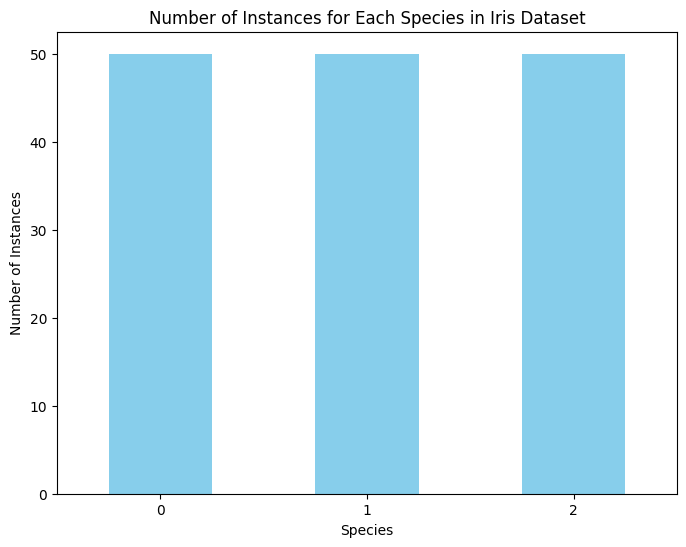

In [35]:
# Plot the bar plot
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Instances for Each Species in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)  # Rotate x labels to horizontal for better readability
plt.show()